# EDA for dataset

This notebook is for looking at the training dataset. Here I am looking at the variables avaliable to see distributions and outliers, how each relates to the target "Sale Price", and how many null values each has.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Getting an idea of the distribution for the target varible (sale price)

Text(0, 0.5, 'Counts')

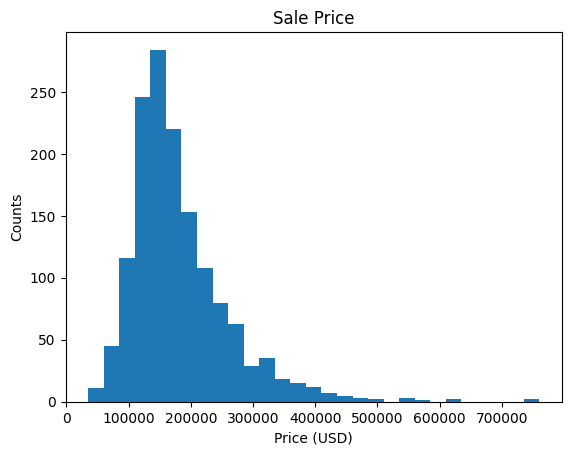

In [99]:
bins = np.arange(df['SalePrice'].min(), df['SalePrice'].max()+25000, 25000)
plt.hist(df['SalePrice'], bins=bins)
plt.title('Sale Price')
plt.xlabel('Price (USD)')
plt.ylabel('Counts')

Check columns with most number of null values

In [100]:
missing = df.isnull().mean().sort_values(ascending=False)
missing.head(10)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
dtype: float64

Looking at the (numeric) variables most correlated with sale price

In [101]:
corr = df.corr(numeric_only=True)['SalePrice'].sort_values()
print(corr.tail(5))
highest_corr = corr[-10:-1].index
highest_corr

GarageArea     0.623431
GarageCars     0.640409
GrLivArea      0.708624
OverallQual    0.790982
SalePrice      1.000000
Name: SalePrice, dtype: float64


Index(['YearBuilt', 'TotRmsAbvGrd', 'FullBath', '1stFlrSF', 'TotalBsmtSF',
       'GarageArea', 'GarageCars', 'GrLivArea', 'OverallQual'],
      dtype='str')

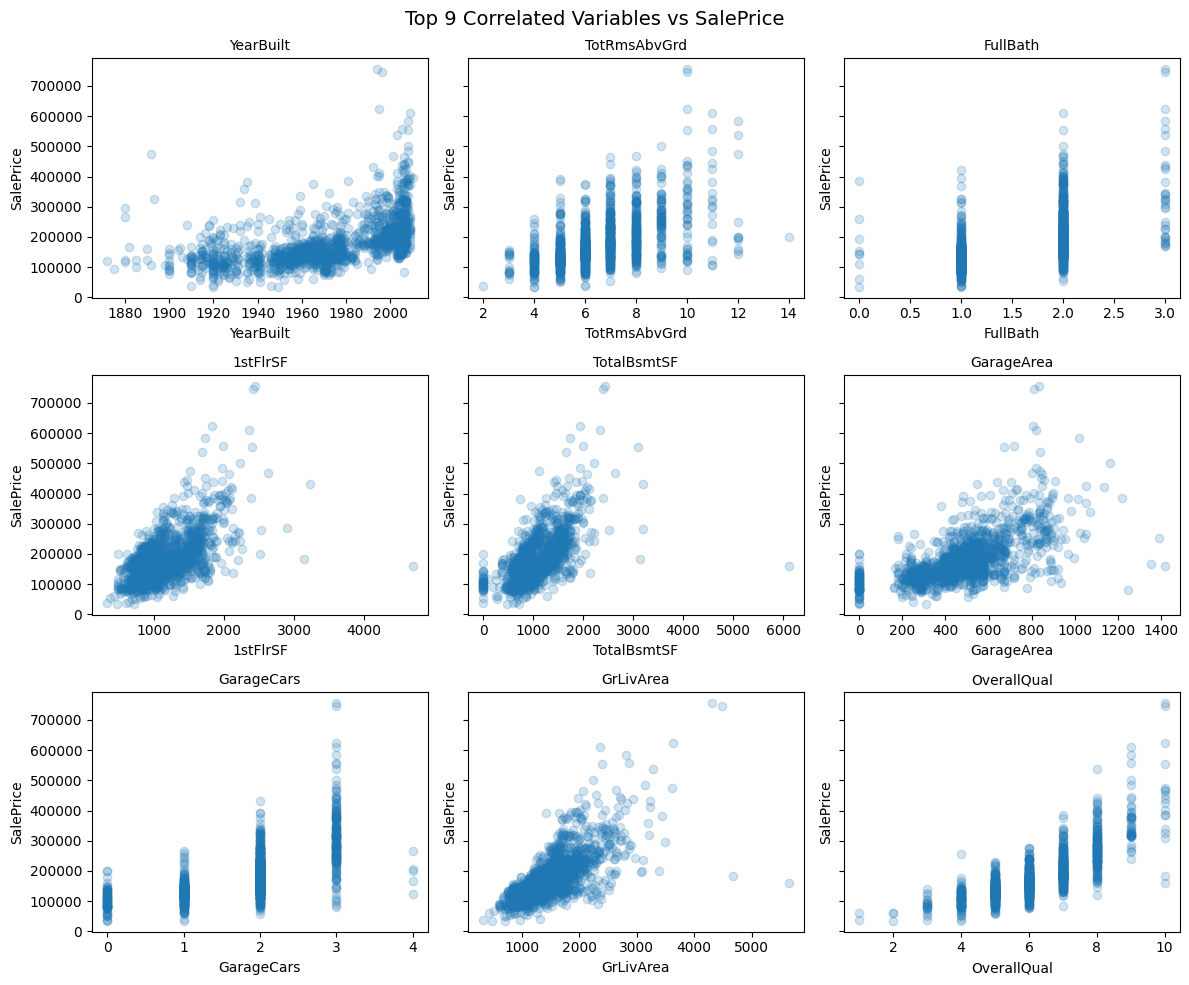

In [127]:
fig, axes = plt.subplots(3,3, figsize=(12,10), sharey=True)
axes = axes.flatten()
plt.subplots_adjust(hspace=0.3)

for i in range(len(highest_corr)):
    ax = axes[i]
    sns.regplot(data=df, x=highest_corr[i], y='SalePrice', scatter_kws={'alpha':0.2}, ax=ax, fit_reg=False)
    ax.set_title(highest_corr[i], fontsize=10)

fig.suptitle("Top 9 Correlated Variables vs SalePrice", fontsize=14)
plt.tight_layout()


Checking outlier cases for large living area and very low price

In [117]:
outliers_1 = df[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 300000)]
outliers_1[['TotRmsAbvGrd', 'YearBuilt', 'YrSold', '1stFlrSF', 'TotalBsmtSF', 'GrLivArea', 'SalePrice']]

,TotRmsAbvGrd,YearBuilt,YrSold,1stFlrSF,TotalBsmtSF,GrLivArea,SalePrice
523,11,2007,2007,3138,3138,4676,184750
1298,12,2008,2008,4692,6110,5642,160000


Dropping outliers

Text(0, 0.5, 'Sale Price')

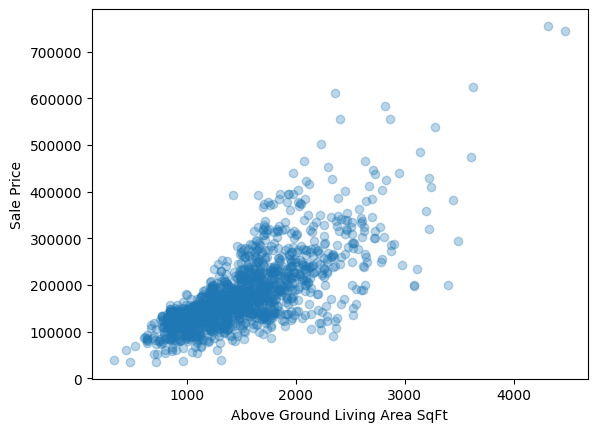

In [118]:
df_cleaned = df.drop(index=outliers_1.index)
plt.scatter(data=df_cleaned, x='GrLivArea', y='SalePrice', alpha=0.3)
plt.xlabel('Above Ground Living Area SqFt')
plt.ylabel('Sale Price')

Now considering qualitative variables

In [128]:
relevant_qual = ['MSSubClass', 'MSZoning', 'Neighborhood', 'BldgType', 'OverallQual', 'KitchenQual']
df_cleaned[relevant_qual].head()

,MSSubClass,MSZoning,Neighborhood,BldgType,OverallQual,KitchenQual
0,60,RL,CollgCr,1Fam,7,Gd
1,20,RL,Veenker,1Fam,6,TA
2,60,RL,CollgCr,1Fam,7,Gd
3,70,RL,Crawfor,1Fam,7,Gd
4,60,RL,NoRidge,1Fam,8,Gd


Comparing how the average house price chagnes for different categories of categorical variables

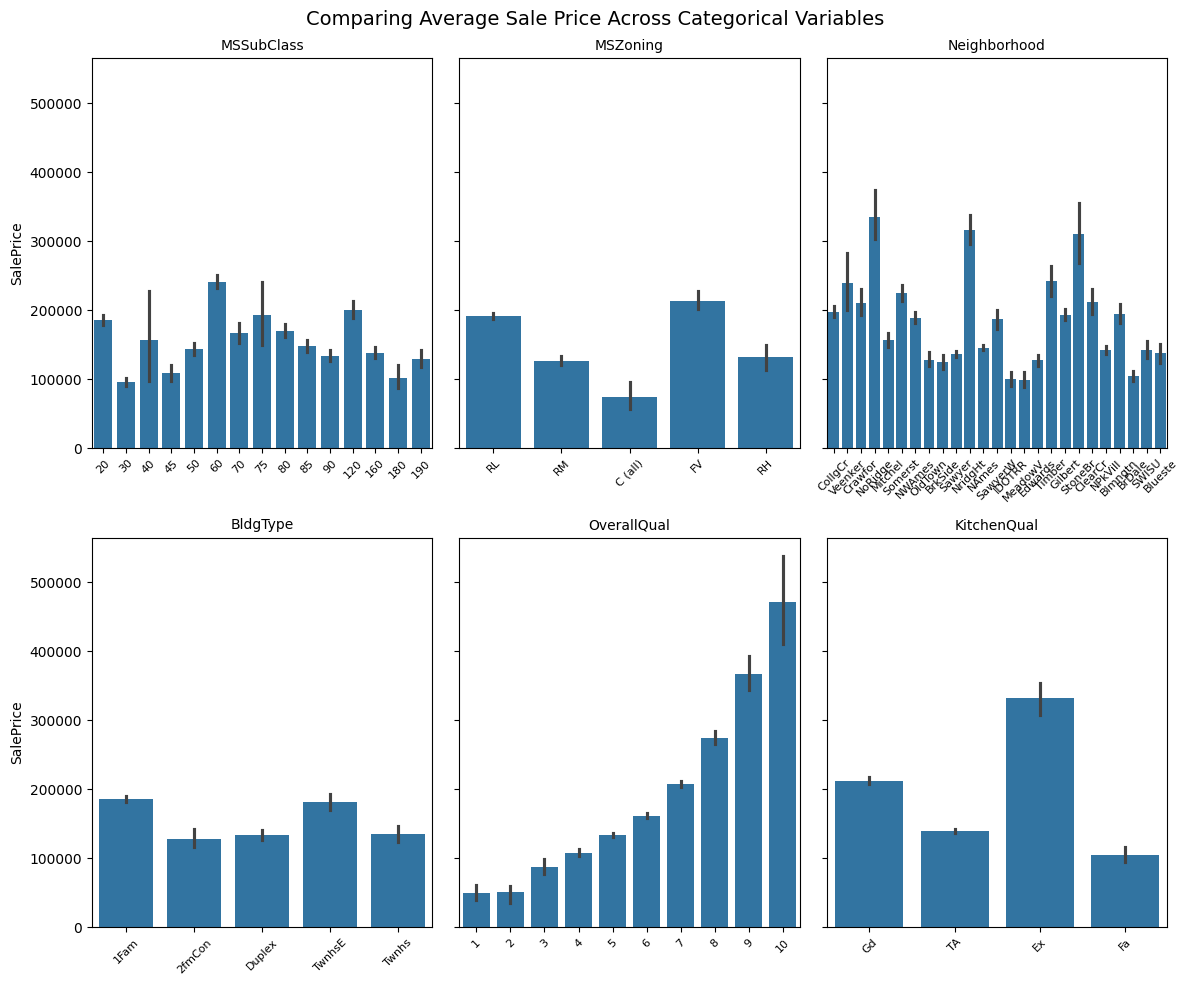

In [129]:
fig, axes = plt.subplots(2,3, figsize=(12,10), sharey=True)
axes = axes.flatten()
plt.subplots_adjust(hspace=0.3)

for i in range(len(relevant_qual)):
    ax = axes[i]
    sns.barplot(data=df_cleaned, x=relevant_qual[i], y='SalePrice', ax=ax)
    ax.set_title(relevant_qual[i], fontsize=10)
    ax.set(xlabel=None)
    ax.tick_params(axis='x', rotation=45, labelsize=8)

fig.suptitle("Comparing Average Sale Price Across Categorical Variables", fontsize=14)
plt.tight_layout()

Here it looks like the OverallQual has the biggest difference in sale prices along with Neighborhood and KitchenQual, but BldgType seems to make little difference